# Handling Outliers and Basic Exploratory Analysis

***The main purpose of this project is to practice, and demonstrate knowledge of data cleaning, working with stakeholders to achieve a business objective, and data analytics***

In [182]:
import pandas as pd
import numpy as np
import seaborn as sns

**Load in the dataframe**

*If you wish to add a csv file, use 'Indicators_remvoed_and_basic_analysis'. You should only be loading in one file at this point*

In [183]:
file = input('Enter the name of the file without the extension: ')
# finals_file = input('Enter the name of the finals semester without the extension: ')

Enter the name of the file without the extension: ods_072021_v04


In [184]:
ods = pd.read_pickle(f'{file}.pkl')
# odsFinals = pd.read_pickle(f'{finals_file}.pkl')

**Add another column that displays the day of the week**

In [185]:
ods['name_of_day'] = ods['exam_date'].dt.day_name()
# odsFinals['name_of_day'] = odsFinals['exam_date'].dt.day_name()

In [186]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11216 entries, 0 to 11239
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   subject                 11216 non-null  object        
 1   section                 11216 non-null  int64         
 2   exam_date               11216 non-null  datetime64[ns]
 3   proctor                 11216 non-null  object        
 4   room_number             11216 non-null  string        
 5   start_time              11216 non-null  datetime64[ns]
 6   end_time                11216 non-null  datetime64[ns]
 7   actual_start            11216 non-null  datetime64[ns]
 8   actual_end              11216 non-null  datetime64[ns]
 9   first_entered           11216 non-null  datetime64[ns]
 10  fileUploaded            11216 non-null  object        
 11  received_as_paper_copy  11216 non-null  object        
 12  rescheduled             11216 non-null  float6

## *Basic Summary Statistics and Outliers for Regular Semester Exams*

In [187]:
ods[['allotted_time', 'actual_time', 'requested_in_advance']].describe()

,allotted_time,actual_time,requested_in_advance
count,11216.000000,7682.000000,11216.000000
mean,144.398805,86.366701,40.477443
std,122.298331,55.912566,34.642417
min,0.000000,0.000000,-4.000000
25%,100.000000,48.000000,8.000000
50%,120.000000,76.000000,31.000000
75%,150.000000,112.000000,69.000000
max,5070.000000,642.000000,123.000000


*A few noticeable issues and questions:*
1. 5070 minutes is too much time allotted_time for one student
2. 642 minutes is too much actual_time for one student
3. Why do we have an exam that was scheduled -4 days in advance
4. Did a student really schedule an exam 123 days in advance? It is possible
5. There shouldn't be a value of zero for allotted_time and actual_time

### 5070 Minute Allotted Time

*What exams were these for, and when did they happen?*

In [188]:
ods.loc[ods['allotted_time'] == 5070, ['subject', 'allotted_time', 'exam_date', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,allotted_time,exam_date,extra_time_1.50x,extra_time_2.00x
7064,ENGR,5070.0,2020-01-28,No,No
8212,ENGR,5070.0,2020-02-18,No,No
9229,ENGR,5070.0,2020-03-10,No,No
10201,ENGR,5070.0,2020-04-14,No,No
10343,ENGR,5070.0,2020-04-17,No,No


*Since we are unable to use student identifiers, we need to use the portal to look up who the students are and who the teacher is to verify allotted_time. The ODS portal is the information system ODS uses to process testing and accommodation data*

***The exams in question all belong to one student, and for the same teacher. According to the exam agreement, the length of the exam (without extended time) was 70 minutes, and the student did not have an extended time accommodation. Thus, we can replace these values with 5070***

In [189]:
ods.loc[7064, ['allotted_time']] = 70
ods.loc[8212, ['allotted_time']] = 70
ods.loc[9229, ['allotted_time']] = 70
ods.loc[10201, ['allotted_time']] = 70
ods.loc[10343, ['allotted_time']] = 70

*The highest amount of time allotted for exams are for GBA finals, which are 480 minutes?*

In [190]:
ods.loc[ods['allotted_time'] > 480]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4795,HY,28,2019-12-10,Bulls,46,2019-12-10 13:00:00,2019-12-10 23:00:00,2019-12-10 13:00:00,2019-12-10 16:28:00,2019-12-06 17:04:00,...,Yes,No,No,Yes,600.0,208.0,False,False,4,Tuesday
5693,AEM,100,2019-08-01,Bulls,05,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-07-23 11:26:00,...,No,No,No,No,600.0,NaN,False,True,9,Thursday
5705,ECE,150,2019-08-01,Bulls,18,2019-08-01 08:00:00,2019-08-01 18:00:00,2019-08-01 08:24:00,2019-08-01 12:48:00,2019-07-31 10:41:00,...,No,No,No,No,600.0,264.0,False,False,1,Thursday
5736,KIN,100,2019-08-02,Bulls,19,2019-08-02 08:00:00,2019-08-02 18:00:00,2019-08-02 08:14:00,2019-08-02 08:38:00,2019-08-01 08:47:00,...,No,No,No,No,600.0,24.0,False,False,1,Friday
6969,OM,320,2020-12-09,Vanslambrouck,01,2020-12-09 12:15:00,2020-12-09 22:15:00,2020-12-09 12:14:00,2020-12-09 15:14:00,2020-12-04 13:10:00,...,Yes,No,No,No,600.0,180.0,False,False,5,Wednesday
7643,PHL,1,2020-02-10,Bulls,31,2020-02-10 10:00:00,2020-02-10 22:30:00,2020-02-10 10:00:00,2020-02-10 22:30:00,2020-01-16 21:17:00,...,No,No,Yes,No,750.0,NaN,True,False,25,Monday
9533,PHL,1,2020-03-13,Unspecified,11,2020-03-13 10:00:00,2020-03-13 22:30:00,2020-03-13 10:00:00,2020-03-13 22:30:00,2020-01-16 21:17:00,...,No,No,Yes,No,750.0,NaN,True,False,57,Friday


*(Research done in ODS Portal)*
1. For HY 28, the instructor did not list the final exam amount, but since most finals are 2.5 hours (150 minutes), its likely that the instructor simply added the extra time in before inputing the amount in the portal, then the system added the extra time on top of that - *Change HY 28 allotted_time to 300*
2. For AEM it is the sam problem. The extra time likely got added on preemptively by the instructor - *Change AEM 100 to 300*
3. Same for ECE - *Change ECE 150 to 300*
4. Same for KIN; this case was interesting considering that the instructor input the correct time on another exam in the same exact course but for another student, illustrating how easy it is for bad data to show up in our dataset - *Change KIN 100 to 300*
5. Same for OM 320 - *Change OM 320 to 300*
6. Neither instances of PHL appear in the portal. I am not sure why this is. They could've been cancelled early in the process - *Drop both occurences of PHL 1*

In [191]:
ods.loc[4795, ['allotted_time']] = 300
ods.loc[5693, ['allotted_time']] = 300
ods.loc[5705, ['allotted_time']] = 300
ods.loc[5736, ['allotted_time']] = 300
ods.loc[6969, ['allotted_time']] = 300
ods.drop(index=7643, inplace=True)
ods.drop(index=9533, inplace=True)

### 642 Actual Time

*The highest time a student should have taken for exams is 480, which were GBA finals. Why do we have exams over that?*

In [192]:
ods[ods['actual_time'] > 480]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4672,ECE,1,2019-12-10,Bulls,33,2019-12-10 08:00:00,2019-12-10 13:00:00,2019-12-10 08:00:00,2019-12-10 16:59:00,2019-12-06 07:41:00,...,Yes,No,No,No,300.0,539.0,False,False,4,Tuesday
4691,ME,2,2019-12-10,Bulls,Virtual Room (Finals Only),2019-12-10 08:00:00,2019-12-10 13:00:00,2019-12-10 08:00:00,2019-12-10 16:37:00,2019-09-26 16:33:00,...,Yes,No,No,No,300.0,517.0,False,False,75,Tuesday
4706,HD,1,2019-12-10,Unspecified,Virtual Room (Finals Only),2019-12-10 08:05:00,2019-12-10 14:05:00,2019-12-10 08:05:00,2019-12-10 17:47:00,2019-09-05 15:27:00,...,Yes,No,No,No,360.0,582.0,False,False,96,Tuesday
5002,EN,14,2019-12-11,Bulls,30,2019-12-11 10:00:00,2019-12-11 15:00:00,2019-12-11 10:02:00,2019-12-11 20:41:00,2019-09-10 07:41:00,...,Yes,No,No,No,300.0,639.0,False,False,92,Wednesday
5004,FI,322,2019-12-11,Bulls,33,2019-12-11 10:00:00,2019-12-11 13:45:00,2019-12-11 10:00:00,2019-12-11 20:42:00,2019-10-18 13:46:00,...,No,No,No,No,225.0,642.0,False,False,54,Wednesday
5006,HY,1,2019-12-11,Unspecified,Virtual Room (Finals Only),2019-12-11 10:00:00,2019-12-11 15:00:00,2019-12-11 10:00:00,2019-12-11 20:42:00,2019-08-23 21:40:00,...,Yes,No,No,No,300.0,642.0,False,False,110,Wednesday
5021,ST,2,2019-12-11,Bulls,48,2019-12-11 10:00:00,2019-12-11 13:45:00,2019-12-11 10:00:00,2019-12-11 20:41:00,2019-08-23 14:37:00,...,No,No,No,No,225.0,641.0,False,False,110,Wednesday
5046,NHM,1,2019-12-11,Bulls,11,2019-12-11 13:00:00,2019-12-11 16:45:00,2019-12-11 12:59:00,2019-12-11 21:05:00,2019-09-03 11:41:00,...,No,No,Yes,No,225.0,486.0,False,False,99,Wednesday
5073,NHM,1,2019-12-11,Bulls,10,2019-12-11 13:10:00,2019-12-11 18:10:00,2019-12-11 13:08:00,2019-12-11 21:13:00,2019-10-10 13:55:00,...,Yes,Yes,No,No,300.0,485.0,False,False,62,Wednesday


*We could impute the actual_times with that of the allotted_times; however, since there is such disparity in the times, there is no way for us to know when the students actually finished. We should drop these values*

In [193]:
drop = ods.loc[ods['actual_time'] > 480].index
ods.drop(index=drop, inplace=True)

### -4 Scheduled in Advance

*Why do we have an exam scheduled -4 days in advance*

In [194]:
ods[ods['requested_in_advance']==-4]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
5611,KIN,100,2019-07-20,Unspecified,39,2019-07-20 10:00:00,2019-07-20 14:30:00,2019-07-20 10:00:00,2019-07-20 14:30:00,2019-07-24 09:16:00,...,No,No,No,No,270.0,NaN,True,False,-4,Saturday


*The student did not take this exam on the 24th nor on the 20th. We are going to drop it.*

In [195]:
ods.drop(index=5611, inplace=True)

*Any more less than zero?*

In [196]:
ods[ods['requested_in_advance'] <0.0]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day
4987,EC,320,2019-12-11,Unspecified,01,2019-12-11 08:30:00,2019-12-11 12:15:00,2019-12-11 08:30:00,2019-12-11 12:15:00,2019-12-12 08:25:00,...,No,No,No,No,225.0,NaN,True,False,-1,Wednesday


*On this one, the student actually took the test on the 12th not the 11th. We need to update the exam_date*

In [199]:
ods.loc[4987, ['exam_date']] ='2019-12-12'
ods.loc[4987, ['requested_in_advance']] = 0.0

### 123 days Advance Scheduling

*Did a student really schedule 123 days in advance?*

In [201]:
ods[ods['requested_in_advance']==123.0]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,requested_in_advance,name_of_day,days_requested_submitted_in_advance
5600,PSC,2,2019-12-24 00:00:00,Unspecified,39,2019-12-24 14:00:00,2019-12-24 16:20:00,2019-12-24 14:00:00,2019-12-24 16:20:00,2019-08-23 17:24:00,...,No,Yes,No,140.0,NaN,True,False,123,Tuesday,NaN


*The exam was cancelled likely due to the fact that it was scheduled for Christmas Eve, when the univeristy is closed. We can drop this exam*

In [202]:
ods.drop(index=5600, inplace=True)

### 0.0 for Actual Time

*Exams should not have zero actual time. If the student cancelled or was a no show, there should be a null*

**Assign the index of those values that have 0.0 to a new variable**

In [204]:
zero_time = ods.loc[ods['actual_time']== 0.0, ['proctor','subject', 'section', 'exam_date','start_time', 'end_time', 'actual_start', 'actual_end',
                                   'allotted_time', 'actual_time']].index

*(Researched in ODS Portal)*
*It looks like these exams were not checked in and when the student finished, the testing coordinator marked their exam as 'Complete', which takes begins and ends their time at the time the coordinator marked it as complete. We will fix the actual start time to the scheduled start time and the actual time will be the difference between the exam start and the actual end*

***After alot of trial and error, I finally found that using '.at[]' works so much better when setting the values of timeseries in a dataframe***

**Use a for loop to loop through the rows, converting the time, then convert the column to timedelta dtype. Use the 'total_second' method to convert to float and then divide by 60 to get the total length of the exam in minutes**

In [205]:
for i in zero_time:
    ods.at[i, 'actual_start'] = ods.at[i, 'start_time']
    ods.at[i, 'actual_time'] = ods.at[i, 'actual_end'] - ods.at[i, 'actual_start']

ods['actual_time'] = pd.to_timedelta(ods['actual_time'], unit='m')
ods['actual_time'] = ods['actual_time'].dt.total_seconds()/60.0
ods['actual_time']

0        12.0
1        21.0
2        18.0
3         6.0
4         NaN
         ... 
11235     NaN
11236     NaN
11237     NaN
11238     NaN
11239     NaN
Name: actual_time, Length: 11203, dtype: float64

In [206]:
ods.loc[zero_time, ['subject', 'section', 'exam_date', 'start_time', 'end_time', 'actual_start', 'actual_end', 'allotted_time', 'actual_time']]

,subject,section,exam_date,start_time,end_time,actual_start,actual_end,allotted_time,actual_time
376,CD,1,2019-09-17 00:00:00,2019-09-17 13:00:00,2019-09-17 14:53:00,2019-09-17 13:00:00,2019-09-17 13:29:00,113.0,29.0
710,EN,4,2019-09-23 00:00:00,2019-09-23 12:00:00,2019-09-23 13:15:00,2019-09-23 12:00:00,2019-09-23 13:03:00,75.0,63.0
1001,LGS,336,2019-09-25 00:00:00,2019-09-25 18:30:00,2019-09-25 20:23:00,2019-09-25 18:30:00,2019-09-25 17:54:00,113.0,-36.0
1274,PY,10,2019-10-01 00:00:00,2019-10-01 14:00:00,2019-10-01 15:53:00,2019-10-01 14:00:00,2019-10-01 14:42:00,113.0,42.0
1277,RHM,1,2019-10-01 00:00:00,2019-10-01 14:00:00,2019-10-01 15:40:00,2019-10-01 14:00:00,2019-10-01 14:20:00,100.0,20.0
1630,MKT,5,2019-10-08 00:00:00,2019-10-08 14:00:00,2019-10-08 15:53:00,2019-10-08 14:00:00,2019-10-08 14:37:00,113.0,37.0
1720,PY,2,2019-10-09 00:00:00,2019-10-09 10:00:00,2019-10-09 11:40:00,2019-10-09 10:00:00,2019-10-09 11:02:00,100.0,62.0
1817,KIN,1,2019-10-10 00:00:00,2019-10-10 11:00:00,2019-10-10 12:53:00,2019-10-10 11:00:00,2019-10-10 13:30:00,113.0,150.0
2060,EC,1,2019-10-15 00:00:00,2019-10-15 16:00:00,2019-10-15 17:53:00,2019-10-15 16:00:00,2019-10-15 16:28:00,113.0,28.0
2125,RHM,2,2019-10-16 00:00:00,2019-10-16 11:00:00,2019-10-16 12:15:00,2019-10-16 11:00:00,2019-10-16 11:24:00,75.0,24.0


*1001, 2896 and 9314 should not have started before the actual start time. It is possible that the testing coordinator accidentally checked the student in and checked the student out at check in. Since we have no way of knowing when the student actually finished, we will drop these values*

In [231]:
ods.drop(index=[1001, 2896, 9314], inplace=True)


*Now let's see the summary statistics on this column to see if our data makes more sense*

In [260]:
ods['actual_time'].describe()

count    7669.000000
mean       86.041857
std        53.205286
min         1.000000
25%        48.000000
50%        76.000000
75%       111.000000
max       480.000000
Name: actual_time, dtype: float64

*1 minute is too little time for a student to have taken. If it happened, it happened very rarely. I have a feeling that we will have more instances (like in 1001, 2896, 9314) where the student was checked in and out at check in. This error likely occurs when the testing coordinator and manually sets the time and accidentally checked the student out*



In [263]:
ods.loc[(ods['actual_time']> 0.0) & (ods['actual_time']<= 15.0) & (ods['allotted_time']>= 75.0), ['proctor','subject', 'section', 'exam_date','start_time', 'end_time', 'actual_start', 'actual_end',
                                   'allotted_time', 'actual_time']].sort_values(by='actual_time')

,proctor,subject,section,exam_date,start_time,end_time,actual_start,actual_end,allotted_time,actual_time
9387,Bulls,HD,1,2020-03-12 00:00:00,2020-03-12 09:30:00,2020-03-12 10:45:00,2020-03-12 09:42:00,2020-03-12 09:43:00,75.0,1.0
1067,Vanslambrouck,ARH,1,2019-09-26 00:00:00,2019-09-26 14:00:00,2019-09-26 15:53:00,2019-09-26 14:41:00,2019-09-26 14:42:00,113.0,1.0
5955,Vanslambrouck,BSC,3,2021-02-23 00:00:00,2021-02-23 11:30:00,2021-02-23 14:10:00,2021-02-23 14:02:00,2021-02-23 14:03:00,160.0,1.0
584,Bulls,MATH,4,2019-09-19 00:00:00,2019-09-19 13:00:00,2019-09-19 14:40:00,2019-09-19 13:50:00,2019-09-19 13:51:00,100.0,1.0
1768,Vanslambrouck,MGT,320,2019-10-09 00:00:00,2019-10-09 17:00:00,2019-10-09 19:30:00,2019-10-09 17:10:00,2019-10-09 17:11:00,150.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1084,Vanslambrouck,BSC,4,2019-09-26 00:00:00,2019-09-26 17:00:00,2019-09-26 18:30:00,2019-09-26 17:17:00,2019-09-26 17:32:00,90.0,15.0
7331,Vanslambrouck,BSC,1,2020-02-04 00:00:00,2020-02-04 18:25:00,2020-02-04 21:05:00,2020-02-04 18:30:00,2020-02-04 18:45:00,160.0,15.0
2072,Vanslambrouck,FI,320,2019-10-15 00:00:00,2019-10-15 17:00:00,2019-10-15 18:53:00,2019-10-15 17:14:00,2019-10-15 17:29:00,113.0,15.0
2150,Vanslambrouck,NHM,1,2019-10-16 00:00:00,2019-10-16 15:00:00,2019-10-16 16:40:00,2019-10-16 15:06:00,2019-10-16 15:21:00,100.0,15.0


In [227]:
ods.loc[ods['actual_time']==0.0, ['exam_date','start_time', 'end_time', 'actual_start', 'actual_end', 'allotted_time', 'actual_time']]

,exam_date,start_time,end_time,actual_start,actual_end,allotted_time,actual_time
2896,2019-10-29 00:00:00,2019-10-29 12:30:00,2019-10-29 16:30:00,2019-10-29 12:30:00,2019-10-29 12:30:00,240.0,0.0


*Now let's see if our new minimum makes more sense*

*1 minute seems too low. What instances were 1.0?*

### 0.0 for Allotted Time

*What instances had zero allotted_time?*

In [214]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x
1599,GBA,6,2019-10-08 00:00:00,0.0,NaN,False,True,Yes,No
1755,GBA,21,2019-10-09 00:00:00,0.0,NaN,False,True,No,Yes
3279,EC,4,2019-11-07 00:00:00,0.0,32.0,False,False,Yes,No
3573,GBA,6,2019-11-14 00:00:00,0.0,NaN,False,True,Yes,No
4172,GBA,7,2019-11-22 00:00:00,0.0,147.0,False,False,Yes,No
4439,AEM,1,2019-12-06 00:00:00,0.0,NaN,False,True,Yes,No
5598,HES,3,2019-12-17 00:00:00,0.0,NaN,False,True,No,Yes
7229,PY,8,2020-02-03 00:00:00,0.0,32.0,False,False,Yes,No
7237,FI,321,2020-02-03 00:00:00,0.0,67.0,False,False,Yes,No
7832,CJ,1,2020-02-11 00:00:00,0.0,NaN,True,False,No,Yes


For Exams that have 0.0 allotted time and have null actual time values:
1. GBA exams with no time allotted and null were either incorrectly scheduled by the student, and cancelled by staff or rescheduled for another time
2. CJ exams were given online and allowed the entire day to take the exam; they did not test at ODS
3. AEM exam was cancelled
4. HES exam was cancelled
5. FI 321 exam was cancelled

*I am not sure why the system recorded the exam as zero allotted time in these instances, where it still lists the allotted time in other cancelled exams. My theory is that the exams were cancelled before they could've been approved by ODS staff. We will drop these from the dataframe*

In [215]:
ods.drop(index=ods[(ods['allotted_time'] == 0.0) & (ods['actual_time'].isna())].index, inplace=True)

*What do we have left?*

In [216]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x
3279,EC,4,2019-11-07 00:00:00,0.0,32.0,False,False,Yes,No
4172,GBA,7,2019-11-22 00:00:00,0.0,147.0,False,False,Yes,No
7229,PY,8,2020-02-03 00:00:00,0.0,32.0,False,False,Yes,No
7237,FI,321,2020-02-03 00:00:00,0.0,67.0,False,False,Yes,No
8854,BSC,2,2020-03-03 00:00:00,0.0,70.0,False,False,Yes,No


*Now, we can fill in the '0.0' for allotted times where an actual time was recorded for that subject on the same day. We need to research the portal to do this*

**Drop rows that have no values to reference**

*7237 has no reference in the portal, so we can drop that record*

In [217]:
ods.drop(index=7237,inplace=True)

**Fill in the missing allotted time for EC, GBA, PY, and BSC**

In [218]:
ods.loc[3279, ['allotted_time']]=113.0
ods.loc[4172, ['allotted_time']]=360.0
ods.loc[7229, ['allotted_time']]=75.0
ods.loc[8854, ['allotted_time']]=120.0

*Run the code again to make sure we got everything*

In [221]:
ods.loc[ods['allotted_time'] == 0.0, ['subject', 'section', 'exam_date',
                                      'allotted_time', 'actual_time',
                                      'no_show', 'exam_cancelled', 'extra_time_1.50x', 'extra_time_2.00x']]

,subject,section,exam_date,allotted_time,actual_time,no_show,exam_cancelled,extra_time_1.50x,extra_time_2.00x


## Drop Exams after 03/13/2020, but before 09/01/2020

*These exams were scheduled before covid but never took place*

In [337]:
ods.loc[(ods['exam_date'] > '2020-03-13') & (ods['exam_date']< '2020-09-01')]

TypeError: '>' not supported between instances of 'Timestamp' and 'str'

In [338]:
# Create a variable to store the index value
idx = ods.loc[(ods['exam_date'] > '2020-03-13') & (ods['exam_date']< '2020-09-01')].index

TypeError: '>' not supported between instances of 'Timestamp' and 'str'

In [339]:
# # Drop the COVID cancelled exams
ods.drop(index=idx, inplace=True)

*We have exams that were not cancelled nor a no-show, yet they still have no actual_time. I've looked into this and my best theory is that the exams in these cases were cancelled before they could've been approved. They should be dropped*

In [38]:
# Find the exams with no actual_time
ods[ods['actual_time']==0.0]

,subject,section,exam_date,proctor,room_number,start_time,end_time,actual_start,actual_end,first_entered,...,extra_time_2.00x,makeup_accommodation,noScantronExam,readerForExams,allotted_time,actual_time,exam_cancelled,no_show,days_requested_submitted_in_advance,name_of_day
376,CD,1,2019-09-17,Bulls,42,13:00:00,14:53:00,13:29:00,13:29:00,2019-09-10 13:12:00,...,No,No,No,No,113.0,0.0,False,False,7.0,Tuesday
710,EN,4,2019-09-23,Bulls,45,12:00:00,13:15:00,13:03:00,13:03:00,2019-09-09 14:01:00,...,No,No,No,No,75.0,0.0,False,False,14.0,Monday
1001,LGS,336,2019-09-25,Unspecified,Not Specified,18:30:00,20:23:00,17:54:00,17:54:00,2019-09-25 17:53:00,...,No,No,No,No,113.0,0.0,False,False,0.0,Wednesday
1274,PY,10,2019-10-01,Vanslambrouck,48,14:00:00,15:53:00,14:42:00,14:42:00,2019-09-01 15:52:00,...,No,No,No,No,113.0,0.0,False,False,30.0,Tuesday
1277,RHM,1,2019-10-01,Vanslambrouck,14,14:00:00,15:40:00,14:20:00,14:20:00,2019-09-05 17:18:00,...,Yes,No,No,No,100.0,0.0,False,False,26.0,Tuesday
1630,MKT,5,2019-10-08,Bulls,13,14:00:00,15:53:00,14:37:00,14:37:00,2019-09-10 11:23:00,...,No,No,No,No,113.0,0.0,False,False,28.0,Tuesday
1720,PY,2,2019-10-09,Bulls,48,10:00:00,11:40:00,11:02:00,11:02:00,2019-09-04 14:29:00,...,Yes,Yes,No,No,100.0,0.0,False,False,35.0,Wednesday
1817,KIN,1,2019-10-10,Bulls,Scribe,11:00:00,12:53:00,13:30:00,13:30:00,2019-10-04 11:11:00,...,No,No,Yes,No,113.0,0.0,False,False,6.0,Thursday
2060,EC,1,2019-10-15,Vanslambrouck,03,16:00:00,17:53:00,16:28:00,16:28:00,2019-09-05 13:50:00,...,No,No,No,No,113.0,0.0,False,False,40.0,Tuesday
2125,RHM,2,2019-10-16,Bulls,07,11:00:00,12:15:00,11:24:00,11:24:00,2019-10-14 11:59:00,...,No,No,No,No,75.0,0.0,False,False,2.0,Wednesday


In [48]:
index = ods[ods['actual_time']==0.0].index

ods.drop(index=index, inplace=True)

## Double Checking DataFrames before Exporting

In [49]:
ods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9508 entries, 0 to 9550
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   subject                              9508 non-null   object        
 1   section                              9508 non-null   int64         
 2   exam_date                            9508 non-null   datetime64[ns]
 3   proctor                              9508 non-null   object        
 4   room_number                          9508 non-null   string        
 5   start_time                           9508 non-null   object        
 6   end_time                             9508 non-null   object        
 7   actual_start                         9508 non-null   object        
 8   actual_end                           9508 non-null   object        
 9   first_entered                        9508 non-null   datetime64[ns]
 10  fileUploaded

## Exporting to CSV for PostgreSQL and Pickle

In [51]:
ods.to_csv('postgres_export_ods_v01.csv')
ods.to_pickle('pickled_export_ods_v01.pkl')

## Using Visualizations to Guide Cleaning Process in PostgreSQL

count    9508.000000
mean      137.316260
std        60.784024
min         8.000000
25%       100.000000
50%       120.000000
75%       150.000000
max       750.000000
Name: allotted_time, dtype: float64


count    7650.000000
mean       86.698039
std        55.778755
min         1.000000
25%        48.000000
50%        76.000000
75%       112.000000
max       642.000000
Name: actual_time, dtype: float64


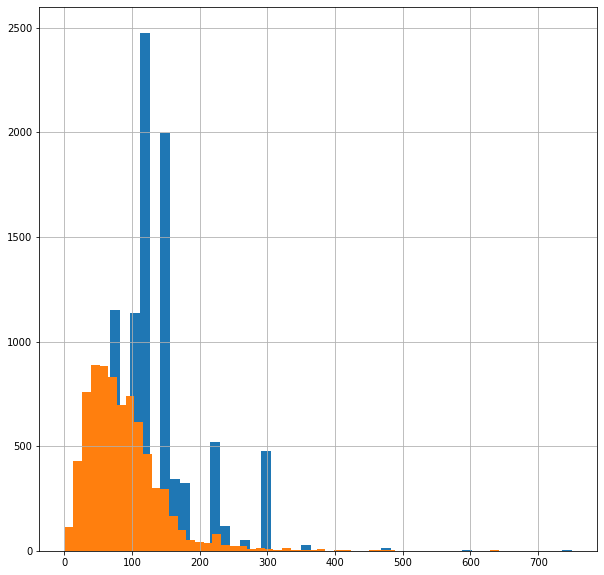

In [54]:
ods['allotted_time'].hist(bins=50, figsize=(10,10))
ods['actual_time'].hist(bins=50)
print(ods['allotted_time'].describe())
print('\n')
print(ods['actual_time'].describe())

<AxesSubplot:>

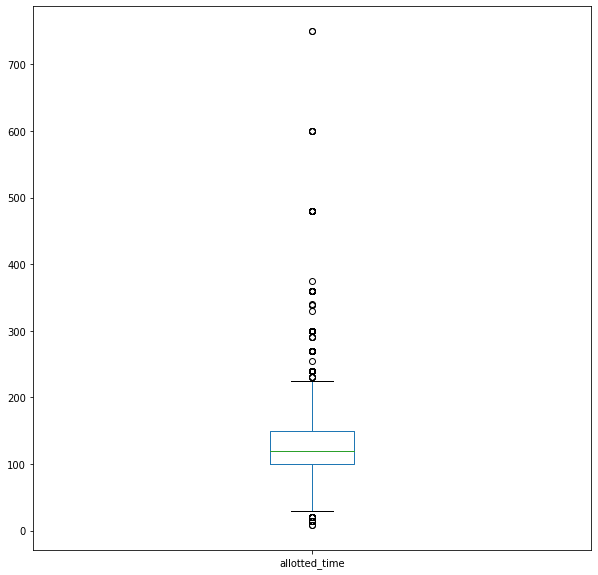

In [55]:
ods['allotted_time'].plot(kind='box', figsize=(10,10))

<AxesSubplot:>

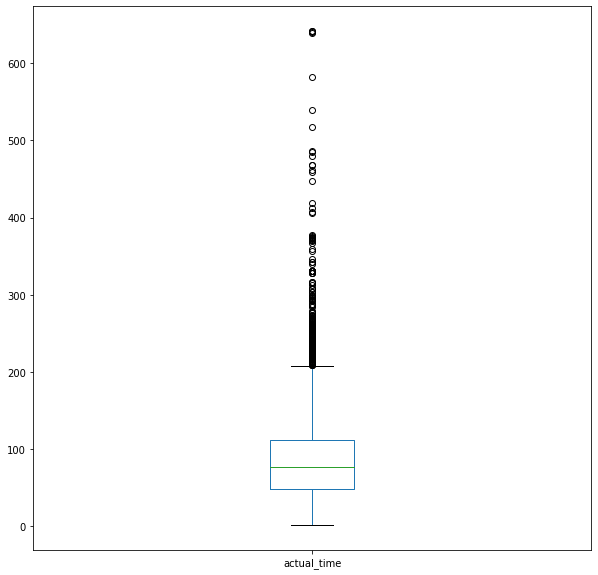

In [56]:
ods['actual_time'].plot(kind='box', figsize=(10,10))

In [232]:
ods[['allotted_time', 'actual_time', 'requested_in_advance']].describe()

,allotted_time,actual_time,requested_in_advance
count,11191.000000,7669.000000,11191.000000
mean,141.976320,86.041857,40.442141
std,62.927745,53.205286,34.620075
min,8.000000,1.000000,0.000000
25%,100.000000,48.000000,8.000000
50%,120.000000,76.000000,31.000000
75%,150.000000,111.000000,69.000000
max,480.000000,480.000000,118.000000
